In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:

img_size = [224, 224]
train_path = '/Users/umabisht/Desktop/PProject/Machine Learning/LungDisease/trainData'
test_path = '/Users/umabisht/Desktop/PProject/Machine Learning/LungDisease/testData'

num_classes = 3


In [3]:

vgg = VGG16(input_shape=img_size + [3], weights='imagenet', include_top=False)

In [4]:

for layer in vgg.layers:
    layer.trainable = False


x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [5]:

model = Model(inputs=vgg.input, outputs=predictions)


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [6]:

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 12003 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [9]:

train_labels = to_categorical(train_set.classes, num_classes=num_classes)
test_labels = to_categorical(test_set.classes, num_classes=num_classes)

checkpoint = ModelCheckpoint(filepath="best_model2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')




In [10]:

model_history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=10,  
    steps_per_epoch=5,
    validation_steps=32,
    verbose=2,
    callbacks=[checkpoint]
)



Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.91992, saving model to best_model2.h5


/Users/umabisht/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 - 329s - loss: 0.2915 - accuracy: 0.9250 - val_loss: 0.3693 - val_accuracy: 0.9199 - 329s/epoch - 33s/step
Epoch 2/10

Epoch 2: val_accuracy did not improve from 0.91992
10/10 - 317s - loss: 0.2586 - accuracy: 0.9281 - val_loss: 0.3595 - val_accuracy: 0.9170 - 317s/epoch - 32s/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.91992
10/10 - 289s - loss: 0.5853 - accuracy: 0.8594 - val_loss: 0.5803 - val_accuracy: 0.8350 - 289s/epoch - 29s/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.91992
10/10 - 886s - loss: 0.3660 - accuracy: 0.8750 - val_loss: 0.4120 - val_accuracy: 0.8721 - 886s/epoch - 89s/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.91992
10/10 - 284s - loss: 0.3467 - accuracy: 0.9031 - val_loss: 0.4978 - val_accuracy: 0.8477 - 284s/epoch - 28s/step
Epoch 6/10

Epoch 6: val_accuracy did not improve from 0.91992
10/10 - 303s - loss: 0.4280 - accuracy: 0.8781 - val_loss: 0.4252 - val_accuracy: 0.8584 - 303s/epoch - 30s/step
Epoch 7

In [11]:


print("Model training completed.")


try:
    loss, accuracy = model.evaluate(test_set, verbose=0)
    print("Test Accuracy: {:.2f}%".format(accuracy * 100))
except Exception as e:
    print("An error occurred during evaluation:", str(e))


Model training completed.
Test Accuracy: 93.77%


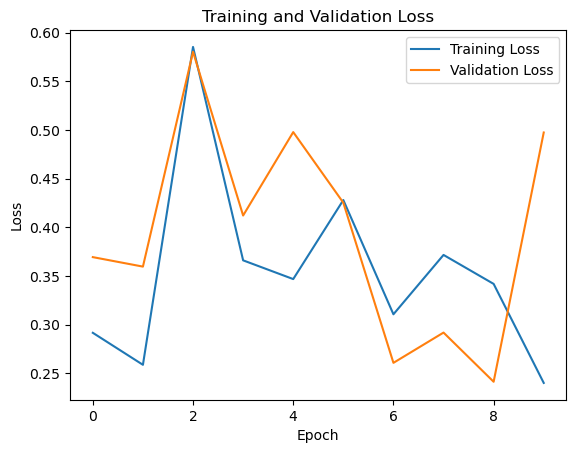

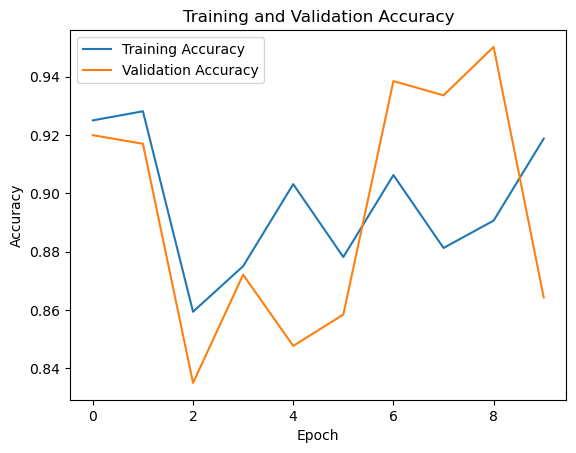

In [12]:

plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
from keras.preprocessing import image as keras_image
from keras.models import load_model
import numpy as np
from keras.applications.vgg16 import preprocess_input

def predict_image_class(image_path, model_path, class_folders):
    img = keras_image.load_img(image_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    processed_img = preprocess_input(img_array)
    model = load_model(model_path) 
    predictions = model.predict(processed_img)
    predicted_class = np.argmax(predictions)
    return class_folders[predicted_class]

# Example usage
image_path = "/Users/umabisht/Desktop/img.jpg"
model_path = "best_model2.h5"
class_folders = ['lung_aca', 'lung_n', 'lung_scc']  
predicted_class = predict_image_class(image_path, model_path, class_folders)
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 420ms/step
Predicted class: lung_scc


94/94 [==============================] - 643s 7s/step


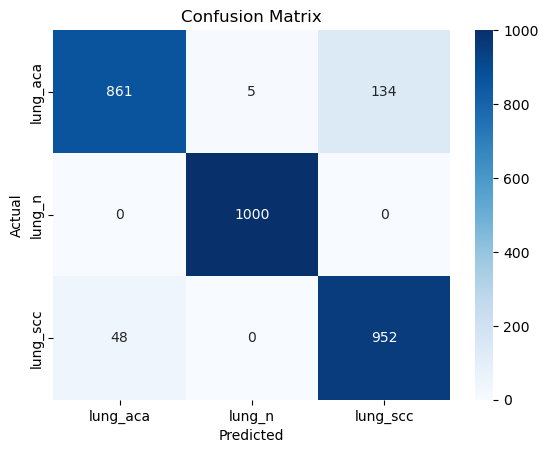

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1000
           1       1.00      1.00      1.00      1000
           2       0.88      0.95      0.91      1000

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

# Predict probabilities for test set
y_pred_prob = model.predict(test_set)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels
y_true = test_set.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_folders, yticklabels=class_folders)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate classification report
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)
